# Working with Text Data - Text Preprocessing and Feature Extraction (Text to Numerical Vector)

##### Text Data

Text Analysis is a major application field for machine learning algorithms. Some of the major application areas of NLP are:

1. Spell Checker, Keyword Search, etc
2. Sentiment Analysis, Spam Classification
3. Machine Translation
4. Chatbots/Dialog Systems
5. Question Answering Systems
etc..

However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

##### Why NLP is hard?
1. Complexity of representation
 Poems, Sarcasm, etc...
 Example 1: This task is a piece of cake.
 Example 2: You have a football game tomorrow. Break a leg!

2. Ambiguity in Natural Language
 Ambiguity means uncertainity of meaning.
 For Example: The car hit the pole while it was moving.

#### Text Preprocessing

1. Removing special characters and punctuations
2. Convert sentence into lower case
3. Tokenisation
4. Removing stop words
5. Stemming or Lemmatization

### Feature Extraction Techniques (Convert Text to Numerical Vectors)

1. Bag of Words
2. TF IDF (Term Frequency - Inverse Document Frequency)
3. Word2Vec (by Google)
4. GloVe (Global Vectors by Stanford) - Not Covered in this notebook
5. Pretrained GloVe Embeddings
6. FastText (by Facebook) - Not Covered in this notebook
7. ELMo (Embeddings from Language Models) - Not Covered in this notebook
8. BERT (Bidirectional Encoder Representations from Transformer)
9. GPT
10. LLM's

### Text Preprocessing Steps

Text Preprocessing steps include some essential tasks to clean and remove the noise from the available data.

1. Removing Special Characters and Punctuation - Special characters like ^, ~, @, $, etc... Punctuations like ., ?, ,, etc...

2. Converting to Lower Case - We convert the whole text corpus to lower case to reduce the size of the vocabulary of our text data.

3. Tokenization (Sentence Tokenization and Word Tokenization) - This is a simple step to break the text into sentences or words.

4. Removing Stop Words - Stopwords don't contribute to the meaning of a sentence. So, we can safely remove them without changing the meaning of the sentence. For eg: it, was, any, then, a, is, by, etc are the stopwords.

5. Stemming or Lemmatization - Stemming is the process of removing suffixes and reducing a word to some root form. For eg: warm, warmer, warming can be converted to warm.

Install nltk
! pip install nltk

In [2]:
import nltk

# Download the punctions
nltk.download('punkt')
# Download the stopwords
nltk.download('stopwords')
# Downloading wordnet before applying lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/idreesy31/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/idreesy31/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/idreesy31/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/idreesy31/nltk_data...


True

In [1]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [3]:
raw_text = "This 1is Natural-LAnguage-Processing. In this example wE are goIng to Learn variouS text9 preprocessing steps."

print(raw_text)

This 1is Natural-LAnguage-Processing. In this example wE are goIng to Learn variouS text9 preprocessing steps.


In [5]:
# Removing special characters and digits
text = re.sub("[^a-zA-z.]", ' ', raw_text )
print(text)

This  is Natural LAnguage Processing. In this example wE are goIng to Learn variouS text  preprocessing steps.


In [6]:
# change sentence to lower case
text = text.lower()
print(text)

this  is natural language processing. in this example we are going to learn various text  preprocessing steps.


In [7]:
# tokenize text into sentences
my_sentences = sent_tokenize(text)
print(my_sentences)

['this  is natural language processing.', 'in this example we are going to learn various text  preprocessing steps.']


In [11]:
# Tokenize sentences to words
for sentence in my_sentences:
    print(word_tokenize(sentence))

['this', 'is', 'natural', 'language', 'processing', '.']
['in', 'this', 'example', 'we', 'are', 'going', 'to', 'learn', 'various', 'text', 'preprocessing', 'steps', '.']


In [8]:
# Tokenize text to words
words = word_tokenize(text)
print(words)

['this', 'is', 'natural', 'language', 'processing', '.', 'in', 'this', 'example', 'we', 'are', 'going', 'to', 'learn', 'various', 'text', 'preprocessing', 'steps', '.']


In [14]:
# Removing stop words
words = [word for word in words if word not in stopwords.words('english')]
print(words)

['natural', 'language', 'processing', '.', 'example', 'going', 'learn', 'various', 'text', 'preprocessing', 'steps', '.']


In [9]:
# Stemming
## initialize the inbuilt stemmer
stemmer = PorterStemmer()
clean_tokens_stem =[stemmer.stem(word) for word in words]
print(clean_tokens_stem)

['thi', 'is', 'natur', 'languag', 'process', '.', 'in', 'thi', 'exampl', 'we', 'are', 'go', 'to', 'learn', 'variou', 'text', 'preprocess', 'step', '.']


In [10]:
# Lemmatizing
## We can also use lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()
clean_tokens_lem = [lemmatizer.lemmatize(word) for word in words]
print(clean_tokens_lem)

['this', 'is', 'natural', 'language', 'processing', '.', 'in', 'this', 'example', 'we', 'are', 'going', 'to', 'learn', 'various', 'text', 'preprocessing', 'step', '.']


Lets put it all together

In [11]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
lst_text = ['it Was the best oF Times $', 
            'It was The worst of times.',
            'IT 9 was tHe age Of wisdom', 
            'it was thE age of foolishness']

df = pd.DataFrame({'text': lst_text})

df.head()

,text
0,it Was the best oF Times $
1,It was The worst of times.
2,IT 9 was tHe age Of wisdom
3,it was thE age of foolishness


In [13]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    text = re.sub("[^a-zA-Z]", ' ', raw_text)

    # change text to lower case
    text = text.lower()

    # tokenize into words
    words = word_tokenize(text)
    
    # remove stop words
    words = [word for word in words if word not in stopwords.words('english')]

    # stemming/lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]

    preprocessed_text = " ".join(words)
    words_in_preprocessed_text = len(words)
    return pd.Series([preprocessed_text, words_in_preprocessed_text])

In [14]:
temp_df = df['text'].apply(lambda x: preprocess(x, 'stem'))
temp_df.head()

,0,1
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [24]:
temp_df.shape

(4, 2)

In [15]:
temp_df.columns = ['clean_text_stem', 'text_length_stem']
temp_df

,clean_text_stem,text_length_stem
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [16]:
df = pd.concat([df,temp_df], axis=1)
df

,text,clean_text_stem,text_length_stem
0,it Was the best oF Times $,best time,2
1,It was The worst of times.,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2
3,it was thE age of foolishness,age foolish,2


In [28]:
temp_df = df['text'].apply(lambda x: preprocess(x, 'lemma'))
temp_df

,0,1
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolishness,2


In [17]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']
temp_df

,clean_text_lemma,text_length_lemma
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [18]:
df = pd.concat([df,temp_df], axis=1)
df

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
0,it Was the best oF Times $,best time,2,best time,2
1,It was The worst of times.,worst time,2,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2
3,it was thE age of foolishness,age foolish,2,age foolish,2


## Bag of Word Representation

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

We will use CountVectorizer to convert text into a matrix of token count.

Bag of Words: https://machinelearningmastery.com/gentle-introduction-bag-words-model/

Code Example: https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

##### We are going to perform below mentioned steps to understand the entire process:
a. Converting text to numerical vectors with the help of CountVectorizer
b. Understand fit and transform
c. Looking at vocabulary_
d. Converting sparse matrix to dense matrix using toarray()
e. Understanding n_gram

Advantages
1. It is simple to understand and implement like OneHotEncoding.
2. We have a fixed length encoding for any sequence of arbitrary length.
3. Documents with same words/vocabulary will have similar representation. So if two documents have a similar vocabulary, they’ll be closer to each other in the vector space and vice versa.

Disadvantages
1. The size of vector increases with the size of the vocabulary. Thus, sparsity continues to be a problem. One way to control it is by limiting the vocabulary to n number of the most frequent words.
2. It does not capture the similarity between different words that mean the same thing. i.e. Semantic Meaning is not captured.
 a. "walk", "walked", and "walking". BoW vectors of all three tokens will be equally apart.
 b. "search" and "explore" are synonyms. BoW won't capture the semantic similarity of these words.

3. This representation does not have any way to handle out of vocabulary (OOV) words (i.e., new words that were not seen in the corpus that was used to build the vectorizer).
4. As the name indicates, it is a “bag” of words. Word order information is lost in this representation. One way to control it is by using n-grams.
5. It suffers from curse of high dimensionality.

In [19]:
df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
0,it Was the best oF Times $,best time,2,best time,2
1,It was The worst of times.,worst time,2,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2
3,it was thE age of foolishness,age foolish,2,age foolish,2


In [20]:
# Bag of words
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
vocab = CountVectorizer()

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.

dtm = vocab.fit_transform(df['clean_text_lemma'])
# fit_transform() could be done seperatly as mentioned below
# vocab.fit(df.clean_text_stem)
# dtm = vocab.transform(df.clean_text_stem)


In [21]:
# We can look at unique words by using 'vocabulary_'
vocab.vocabulary_

{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolish': 2}

In [33]:
# Observe that the type of dtm is sparse

print(type(dtm))

<class 'scipy.sparse._csr.csr_matrix'>


In [34]:
# Lets now print the  shape of this dtm

print(dtm.shape)

# o/p -> (4, 6)
# i.e -> 4 documents and 6 unique words

(4, 6)


In [35]:
# Lets look at the dtm

print(dtm)

# Remember that dtm is a sparse matrix. i.e. zeros wont be stored
# Lets understand First line of output -> (0,1)    1
# Here (0, 1) means 0th document and 1st(index starting from 0) unique word. 
# (we have total 4 documents) & (we have total 6 unique words)
# (0, 1)    1 -> 1 here refers to the number of occurence of 1st word
# Now lets read it all in english.
# (0, 1)    1 -> 'times' occurs 1 time in 0th document. 
# Try to observe -> (3, 2)   1

  (0, 1)	1
  (0, 3)	1
  (1, 3)	1
  (1, 5)	1
  (2, 0)	1
  (2, 4)	1
  (3, 0)	1
  (3, 2)	1


In [38]:
# Since the dtm is sparse, lets convert it into numpy array.

print(dtm.toarray())

[[0 1 0 1 0 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]
 [1 0 1 0 0 0]]


In [22]:
sorted(vocab.vocabulary_)

['age', 'best', 'foolish', 'time', 'wisdom', 'worst']

In [23]:
pd.DataFrame(dtm.toarray(), columns=sorted(vocab.vocabulary_))

,age,best,foolish,time,wisdom,worst
0,0,1,0,1,0,0
1,0,0,0,1,0,1
2,1,0,0,0,1,0
3,1,0,1,0,0,0


In [25]:
# 2-grams
vocab = CountVectorizer(ngram_range=(1,2))
dtm = vocab.fit_transform(df.clean_text_stem)

In [26]:
print(vocab.vocabulary_)

{'best': 3, 'time': 6, 'best time': 4, 'worst': 8, 'worst time': 9, 'age': 0, 'wisdom': 7, 'age wisdom': 2, 'foolish': 5, 'age foolish': 1}


In [27]:
print(dtm)

  (0, 3)	1
  (0, 6)	1
  (0, 4)	1
  (1, 6)	1
  (1, 8)	1
  (1, 9)	1
  (2, 0)	1
  (2, 7)	1
  (2, 2)	1
  (3, 0)	1
  (3, 5)	1
  (3, 1)	1


In [28]:
# convert sparse matrix to numpy array

print(dtm.toarray())

[[0 0 0 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 1 1]
 [1 0 1 0 0 0 0 1 0 0]
 [1 1 0 0 0 1 0 0 0 0]]


In [29]:
pd.DataFrame(dtm.toarray(), columns=sorted(vocab.vocabulary_))

,age,age foolish,age wisdom,best,best time,foolish,time,wisdom,worst,worst time
0,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,1,1
2,1,0,1,0,0,0,0,1,0,0
3,1,1,0,0,0,1,0,0,0,0


Observations:

vect.fit(lst_text) learns the vocabulary
vect.transform(lst_text) uses the fitted vocabulary to build a document-term matrix

# Term Frequency Inverse Document Frequency

In BOW approach all the words in the text are treated as equally important i.e. there's no notion of some words in the document being more important than others. TF-IDF, or term frequency-inverse document frequency, addresses this issue. It aims to quantify the importance of a given word relative to other words in the document and in the corpus.

Let's now try to understand:

Term Frequency
Inverse Document Frequency
 
 
Advantages
If the word is rare in the corpus, it will be given more importance. (i.e. IDF)
If the word is more frequent in a document, it will be given more importance. (i.e. TF)

Disadvantages
 Same as BOW

In [30]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(df.clean_text_lemma)

In [31]:
print(vectorizer.vocabulary_)

{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolish': 2}


In [32]:
print(dtm.toarray())

# convert sparse matrix to nparray

[[0.         0.78528828 0.         0.6191303  0.         0.        ]
 [0.         0.         0.         0.6191303  0.         0.78528828]
 [0.6191303  0.         0.         0.         0.78528828 0.        ]
 [0.6191303  0.         0.78528828 0.         0.         0.        ]]


In [33]:
pd.DataFrame(dtm.toarray(), columns=sorted(vectorizer.vocabulary_))

,age,best,foolish,time,wisdom,worst
0,0.00000,0.785288,0.000000,0.61913,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.61913,0.000000,0.785288
2,0.61913,0.000000,0.000000,0.00000,0.785288,0.000000
3,0.61913,0.000000,0.785288,0.00000,0.000000,0.000000


### Latent Space

A latent space, also known as a latent feature space or embedding space, is an embedding of a set of items within a manifold in which items which resemble each other more closely are positioned closer to one another in the latent space.

### Word Embeddings (Word Vectors)

In natural language processing (NLP), word embedding is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning. Word embeddings can be obtained using a set of language modeling and feature learning techniques where words or phrases from the vocabulary are mapped to vectors of real numbers.

Methods to generate this mapping include neural networks, dimensionality reduction on the word co-occurrence matrix, probabilistic models, explainable knowledge base method, and explicit representation in terms of the context in which words appear.

Traditionally, one of the main limitations of word embeddings (word vector space models in general) is that words with multiple meanings are conflated into a single representation (a single vector in the semantic space). In other words, polysemy and homonymy are not handled properly.

### Word2Vec

"You shall know the word by the company it keeps." by JR Firth

Distributional Semantics (i.e. a word is characterized by the company it keeps)
W2v works well because there is an idea of meaning distribution in the context.

Algorithms to generate Word2Vec Embeddings

1. SkipGram
2. Continuous Bag of Words

Issue
Even if the word is having three different meaning, W2v will return the weighted average of all three as the output. Now the question is,

Is it possible to segregate the three vectors to represent the words based in the context?
$$ OR $$
Is it possible to disambiguate the word vectors based on the context?
Word2Vec is not capturing the contextual information. This is where BERT comes handy.

! pip install gensim
! pip install --upgrade gensim
Run this in command promp (admin mode)

In [34]:
! pip install --upgrade gensim

     |████████████████████████████████| 26.6 MB 1.4 kB/s eta 0:00:01    |▏                               | 163 kB 101 kB/s eta 0:04:21     |█                               | 768 kB 427 kB/s eta 0:01:01     |█▉                              | 1.5 MB 395 kB/s eta 0:01:04     |██▍                             | 2.0 MB 589 kB/s eta 0:00:42     |██▊                             | 2.3 MB 544 kB/s eta 0:00:45     |███▏                            | 2.6 MB 544 kB/s eta 0:00:44     |███▉                            | 3.2 MB 937 kB/s eta 0:00:25     |█████▎                          | 4.3 MB 527 kB/s eta 0:00:43     |██████▋                         | 5.5 MB 1.9 MB/s eta 0:00:12     |██████▊                         | 5.6 MB 1.9 MB/s eta 0:00:12     |██████▉                         | 5.7 MB 1.9 MB/s eta 0:00:12     |███████                         | 5.8 MB 1.9 MB/s eta 0:00:12     |███████▏                        | 5.9 MB 1.9 MB/s eta 0:00:12     |███████▋                        | 6.3 MB 529 kB/s eta 0:

In [35]:
import gensim
print(gensim.__version__)

4.3.2


In [36]:
from gensim.models import Word2Vec

In [37]:
df['tokenised_sentences'] = df.clean_text_stem.apply(lambda sent : sent.split())

df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]"
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]"
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]"
3,it was thE age of foolishness,age foolish,2,age foolish,2,"[age, foolish]"


In [38]:
list(df.tokenised_sentences)

[['best', 'time'], ['worst', 'time'], ['age', 'wisdom'], ['age', 'foolish']]

In [39]:
# train model
model = Word2Vec(list(df.tokenised_sentences), vector_size=100, min_count=1)

In [40]:
print(model)

Word2Vec<vocab=6, vector_size=100, alpha=0.025>


In [41]:
# Total Documents
model.corpus_count

4

In [42]:
# looking at the vocabulary
print(model.wv.key_to_index)
print(model.wv.index_to_key)

{'age': 0, 'time': 1, 'foolish': 2, 'wisdom': 3, 'worst': 4, 'best': 5}
['age', 'time', 'foolish', 'wisdom', 'worst', 'best']


In [43]:
# access the 100 dimensional vector for one of the words

print(model.wv.__getitem__('foolish'))
print(model.wv.__getitem__('foolish').shape)

[ 9.4563962e-05  3.0773198e-03 -6.8126451e-03 -1.3754654e-03
  7.6685809e-03  7.3464094e-03 -3.6732971e-03  2.6427018e-03
 -8.3171297e-03  6.2054861e-03 -4.6373224e-03 -3.1641065e-03
  9.3113566e-03  8.7338570e-04  7.4907029e-03 -6.0740625e-03
  5.1605068e-03  9.9228229e-03 -8.4573915e-03 -5.1356913e-03
 -7.0648370e-03 -4.8626517e-03 -3.7785638e-03 -8.5361991e-03
  7.9556061e-03 -4.8439382e-03  8.4236134e-03  5.2625705e-03
 -6.5500261e-03  3.9578713e-03  5.4701497e-03 -7.4265362e-03
 -7.4057197e-03 -2.4752307e-03 -8.6257253e-03 -1.5815723e-03
 -4.0343284e-04  3.2996845e-03  1.4418805e-03 -8.8142155e-04
 -5.5940580e-03  1.7303658e-03 -8.9737179e-04  6.7936908e-03
  3.9735902e-03  4.5294715e-03  1.4343059e-03 -2.6998555e-03
 -4.3668128e-03 -1.0320747e-03  1.4370275e-03 -2.6460087e-03
 -7.0737829e-03 -7.8053069e-03 -9.1217868e-03 -5.9351693e-03
 -1.8474245e-03 -4.3238713e-03 -6.4606704e-03 -3.7173224e-03
  4.2891586e-03 -3.7390434e-03  8.3781751e-03  1.5339935e-03
 -7.2423196e-03  9.43379

In [44]:
# Access the 100D vectors for all 6 words

print(model.wv.__getitem__(model.wv.index_to_key))

[[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
  -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
  -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
  -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
   2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
   7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
   6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
  -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
   9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
   8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
  -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
  -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
   4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
  -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
   4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
  -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
  -1.508

In [45]:
print(model.wv.__getitem__(model.wv.index_to_key).shape)

(6, 100)


In [ ]:
# save model
# model.save('model/first_word_vectors.bin')

# # load model
# new_model = Word2Vec.load('model/first_word_vectors.bin')
# print(new_model)

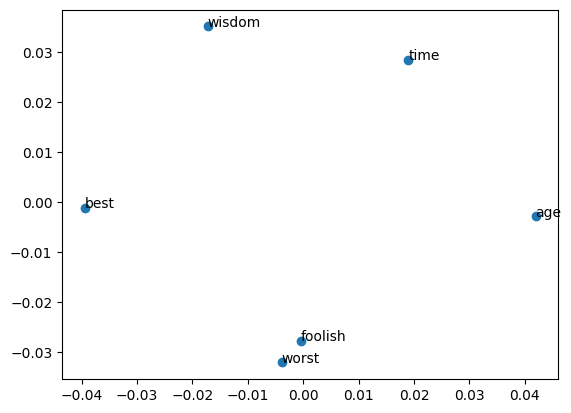

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = model.wv.__getitem__(model.wv.index_to_key)
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [47]:
model.wv.similarity('best', 'worst')

0.13887982

In [48]:
model.wv.most_similar('foolish')

[('worst', 0.17018885910511017),
 ('best', 0.06408978998661041),
 ('wisdom', -0.013514933176338673),
 ('time', -0.023671666160225868),
 ('age', -0.05234673619270325)]

In [49]:
df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]"
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]"
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]"
3,it was thE age of foolishness,age foolish,2,age foolish,2,"[age, foolish]"


Sentence Embedding (Document Vectors)

In [50]:
# Remove out-of-vocabulary words

sentence = ['best', 'dristol', 'time', 'alade']

vocab_tokens = [word for word in sentence if word in model.wv.index_to_key]

vocab_tokens

['best', 'time']

In [51]:
# Create document vectors by averaging word vectors
np.mean(model.wv.__getitem__(vocab_tokens), axis=0)

array([-8.6735850e-03,  2.8979499e-03,  2.1581696e-03, -1.7885750e-03,
       -9.8061212e-04, -3.7891967e-03,  2.7690111e-03,  4.8756767e-03,
       -4.6693720e-03, -6.5232953e-03, -2.7048176e-03, -5.3278962e-03,
       -6.4251497e-03, -1.2493895e-03,  3.0445517e-04, -5.6858570e-04,
        3.8068579e-04,  9.2990650e-04, -3.0666459e-03, -1.1344015e-03,
       -3.3043111e-03, -2.6271159e-03,  8.2706194e-03, -1.0838672e-03,
       -2.2073742e-04, -3.7620717e-04, -9.0713974e-04, -2.5862674e-03,
       -1.3156777e-04,  6.6179251e-03,  7.8556351e-03, -6.5627526e-03,
       -2.5582409e-03, -6.9178990e-03,  1.9483893e-03,  6.0251304e-03,
        6.4321910e-03,  5.5842018e-03,  7.2997799e-03,  3.0152500e-03,
        8.7251253e-03, -7.1729645e-03, -8.2131261e-03, -1.3105709e-03,
       -1.9392008e-03,  2.3391065e-03,  2.6729943e-03,  2.9715800e-03,
        4.0672242e-04,  8.2550046e-05,  5.2809850e-03, -8.9346431e-03,
        3.8251362e-03,  6.0026506e-03, -5.2615297e-03,  5.4140193e-03,
      

In [52]:
np.mean(model.wv.__getitem__(vocab_tokens), axis=0).shape

(100,)

In [53]:
def document_vector(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)


In [54]:
df['doc_vector_w2v'] = df.tokenised_sentences.apply(lambda x : document_vector(x, model.wv))

df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector_w2v
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]","[-0.008673585, 0.00289795, 0.0021581696, -0.00..."
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]","[-0.007879351, 0.0024533845, -0.0009934164, 0...."
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]","[-0.0043894527, 0.004767893, 0.0024528443, 0.0..."
3,it was thE age of foolishness,age foolish,2,age foolish,2,"[age, foolish]","[-0.00022083164, 0.0016568756, -0.0008546477, ..."


### Pretrained GloVe Embeddings

In [1]:
import gensim
import gensim.downloader as api
print(gensim.__version__)
print(list(gensim.downloader.info()['models'].keys()))

4.3.2
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [2]:
wv = api.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
# Approax 200MB Size
# Save Embeddings
# wv.save('embeddings/50d_glove_vec.kv')

# Load Embeddings
# from gensim.models import KeyedVectors
# wv = KeyedVectors.load('embeddings/50d_glove_vec.kv')